# **Name : Nishan Moktan Tamang**


# **ID : 2431864**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:**

Data Exploration and Understanding:
• Dataset Overview:



1.  Load the dataset and display the first 10 rows.
2.  Identify the number of rows and columns in the dataset.
3.List all the columns and their data types.











In [8]:
# To load the dataset
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WHR-2024-5CS037.csv')

In [9]:
# display first 10 rows
first_ten=dataset.head(10)
print("Given first 10 rows :\n\n ",first_ten)

Given first 10 rows :

    Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3              

In [10]:
#rows and columns in dataset
rows, cols = dataset.shape
print(f"\nRows : {rows}\n")
print(f"Columns: {cols}\n")


Rows : 143

Columns: 9



In [11]:
#column and its data type
col_types = dataset.dtypes
print("Columns and their Data Types:\n")
print(col_types)

Columns and their Data Types:

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


**• Basic Statistics:**


1.   Calculate the mean, median, and standard deviation for the Score column.
2.   Identify the country with the highest and lowest happiness scores.



In [12]:
# mean, median, and standard deviation for Score column
mean_score = dataset['score'].mean()
median_score = dataset['score'].median()
standard_score = dataset['score'].std()
print(f"\nMean of Score is: {mean_score}")
print(f"Median of Score is: {median_score}")
print(f"Standard Deviation of Score is: {standard_score}\n")


Mean of Score is: 5.52758041958042
Median of Score is: 5.785
Standard Deviation of Score is: 1.1707165099442995



In [13]:
# Country with the highest and lowest happiness score
highest_coun = dataset.loc[dataset['score'].idxmax(), 'Country name']
highest_score = dataset['score'].max()
lowest_coun = dataset.loc[dataset['score'].idxmin(), 'Country name']
lowest_score = dataset['score'].min()
print(f"Highest country : {highest_coun}  the Score : {highest_score}")
print(f"Lowest country : {lowest_coun}   the Score : {lowest_score}")

Highest country : Finland  the Score : 7.741
Lowest country : Afghanistan   the Score : 1.721



**• Missing Values:**


1.   Check if there are any missing values in the dataset. If so, display the total count for each column.




In [14]:
#  missing values in the dataset
missing_values = dataset.isnull().sum()
print("\nMissing Values Count for Each Column:\n")
print(missing_values)


Missing Values Count for Each Column:

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**• Filtering and Sorting:**


1.  Filter the dataset to show only the countries with a Score greater than 7.5.
2.   For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.





In [15]:

filtered = dataset[dataset['score'] > 7.5]
print("\nCountries having score more than 7.5 are :\n\n",filtered)


Countries having score more than 7.5 are :

   Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [16]:

sorted_dataset = filtered.sort_values(by='Log GDP per capita', ascending=False)
top_ten = sorted_dataset.head(10)
print("\nTop 10 Countries from filtered with score more than 7.5 as per the GDP per Capita:\n\n" , top_ten)


Top 10 Countries from filtered with score more than 7.5 as per the GDP per Capita:

   Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


**• Adding New Columns:**



1.   Create a new column called Happiness Category that categorizes countries into three categories based on their Score: Low − (Score < 4) Medium − (4 ≤ Score ≤ 6) High − (Score > 6)
2.  Data Visualizations:







In [17]:
def happiness_col(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

In [18]:
dataset['Happiness Category'] = dataset['score'].apply(happiness_col)
print("\n Happiness Category added to dataset:\n")
print(dataset.head())
print("\n\n")


 Happiness Category added to dataset:

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724                         0.838       0.221   
4                    0.740                         0.641       0.153   

   Perceptions of corruption  Dystopia + residual Happiness Category  
0                      0.546                2.082               High  
1                 

# **• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.**

<ipython-input-19-f8a9f3dedbab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=happiestCountries, palette='coolwarm')


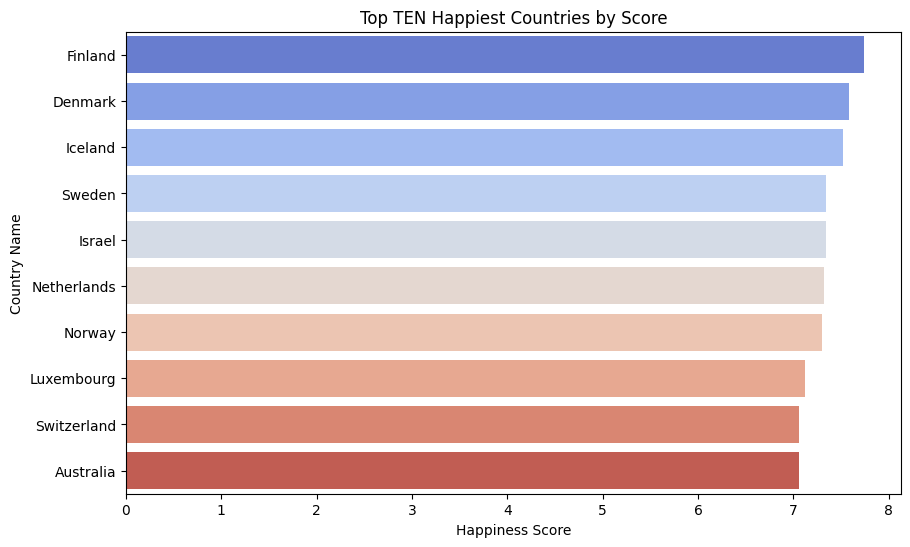

In [19]:
happiestCountries = dataset.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=happiestCountries, palette='coolwarm')
plt.title('Top TEN Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country Name')
plt.show()
print("\n\n")

# **• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.**

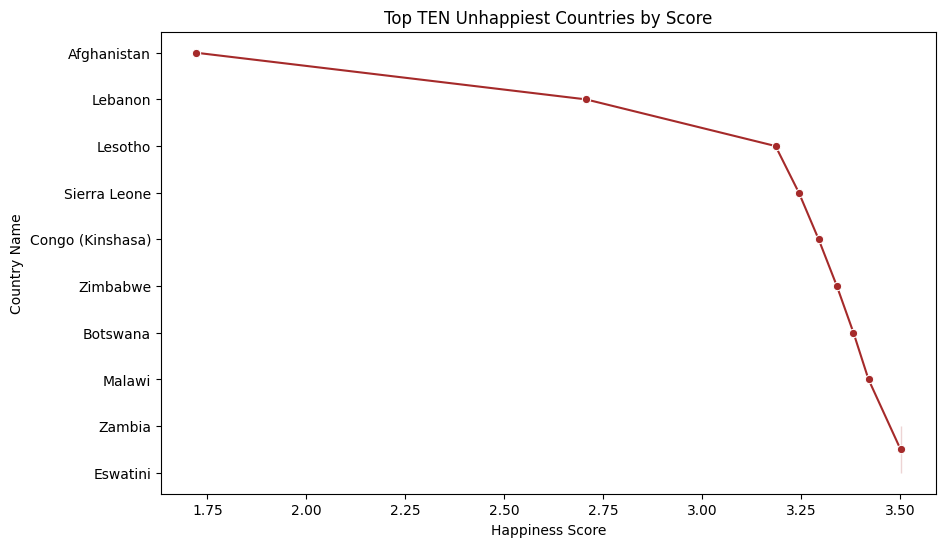

In [20]:
unhappiestCountries = dataset.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
sns.lineplot(x='score', y='Country name', data=unhappiestCountries, marker='o', color='brown')
plt.title('Top TEN Unhappiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country Name')
plt.show()
print("\n\n")

# **• Plot a histogram for the Score column to show its distribution and also interpret.**

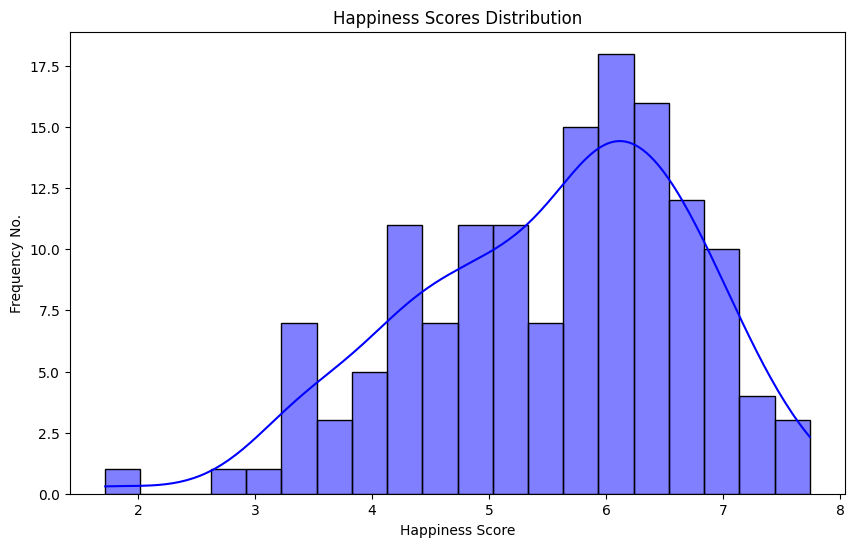

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['score'], bins=20, kde=True, color='blue')
plt.title('Happiness Scores Distribution')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency No.')
plt.show()
print("\n\n")

# **• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.**

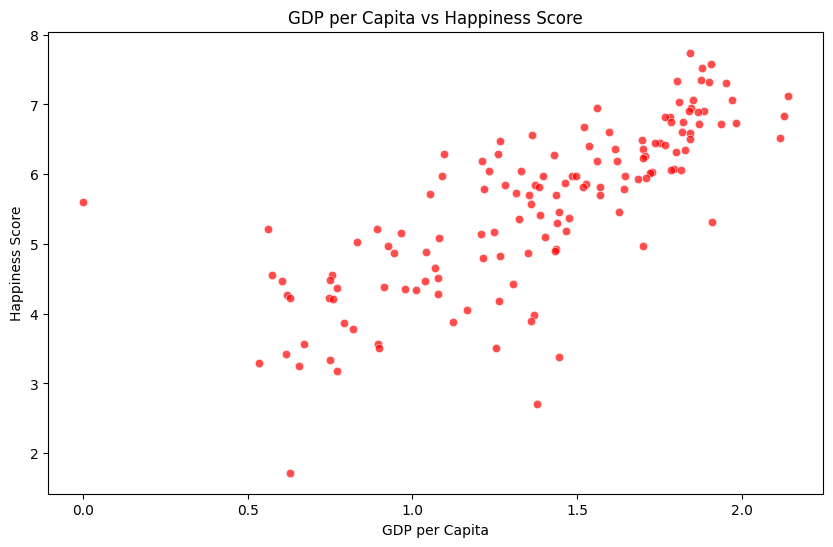

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=dataset, alpha=0.7, color='red')
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

# **3.2 Problem - 2 - Some Advance Data Exploration Task:**
**Task - 1 - Setup Task - Preparing the South-Asia Dataset:**
# Steps:
 1. Define the countries in South Asia with a list for example:
 south asian countries = ["Afgha
 nistan", "Bangladesh", "Bhutan", "India",
 "Maldives", "Nepal", "Pakistan", "Srilanka"]
 2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
 3. Save the filtered dataframe as separate CSV files for future use.

In [23]:

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]
filtered_data = dataset[dataset['Country name'].isin(south_asian_countries)]
filtered_data.to_csv('/content/drive/MyDrive/Colab Notebooks/filtered.csv',index = False)



# **Task - 2 - Composite Score Ranking:**
 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics: Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support 0.30 × Healthy Life Expectancy
 2. Rank the South Asian countries based on the Composite Score in descending order.
 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.


In [24]:
reader = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/filtered.csv")
south_asian_data_frame = pd.DataFrame(reader)
south_asian_data_frame["Composite Score"]=0.40*south_asian_data_frame['Log GDP per capita']+0.30*south_asian_data_frame['Social support']+0.30*south_asian_data_frame['Healthy life expectancy']
south_asian_data_frame.sort_values(by='Composite Score', ascending=False)
top_five=south_asian_data_frame.head(5)
top_five

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774


# **Task - 3 - Outlier Detection:**

 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
 2. Define outliers using the 1.5 × IQR rule.
 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
 in a different color.
 4. Discuss the characteristics of these outliers and their potential impact on regional averages.

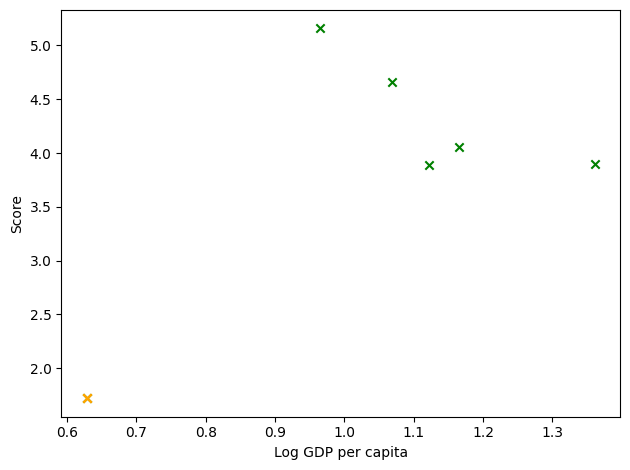

In [25]:
gdp = south_asian_data_frame['Log GDP per capita']
scr= south_asian_data_frame['score']
def outliers(col_name):
    Q1 = col_name.quantile(0.25)
    Q3 = col_name.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (col_name < lower_bound) | (col_name > upper_bound)
outliers_gdp =outliers(gdp)
outliers_scr =outliers(scr)
south_asian_data_frame['Is outlier'] = outliers_gdp|outliers_scr
south_asian_data_frame[south_asian_data_frame['Is outlier']]
x=gdp
y=scr
plt.scatter(x,y,color="green",marker='x')
plt.scatter(south_asian_data_frame[outliers_gdp]['Log GDP per capita'], south_asian_data_frame[outliers_gdp]['score'],
            c='orange',label='GDP Outliers',marker='x')
plt.scatter(south_asian_data_frame[outliers_scr]['Log GDP per capita'], south_asian_data_frame[outliers_scr]['score'],
            c='orange',label='Score Outliers',marker='x')
plt.xlabel("Log GDP per capita")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

# **Task - 4 - Exploring Trends Across Metrics:**

 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
 {pearson correlation} with the Score for South Asian countries
 2. Create scatter plots with trendlines for these metrics against the Score.
 3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
 South Asian countries.

0.8005185224163315 0.874512371253192


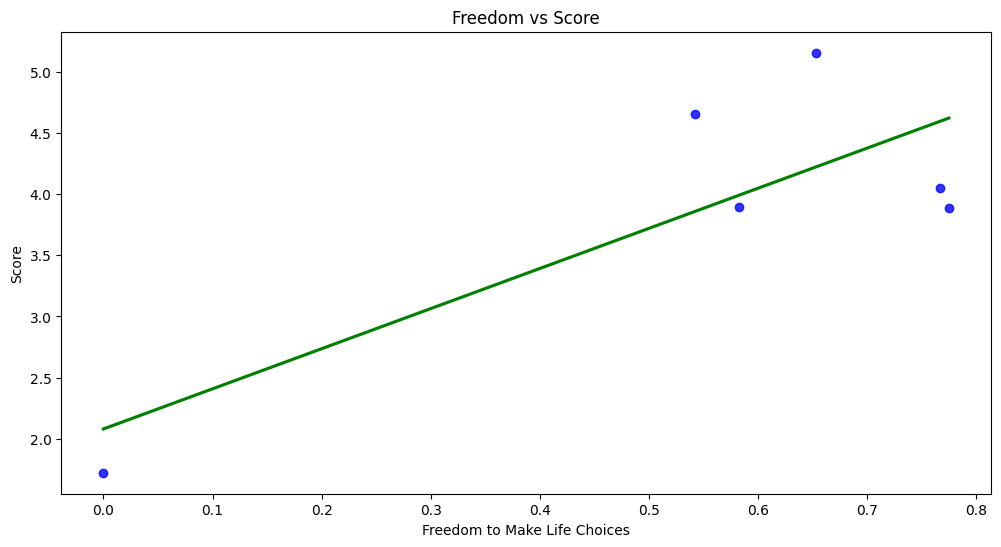

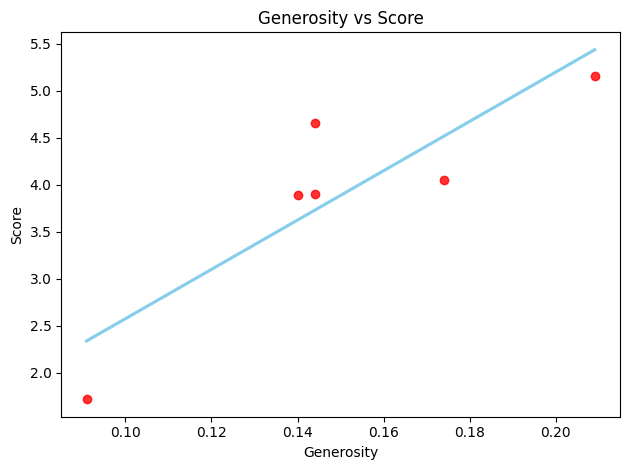

In [26]:
freedom=south_asian_data_frame['Freedom to make life choices']
generosity=south_asian_data_frame['Generosity']
scr = south_asian_data_frame['score']
cor_freedom=freedom.corr(scr,method='pearson')
cor_generosity=generosity.corr(scr,method='pearson')
print(cor_freedom,cor_generosity)
plt.figure(figsize=(12, 6))
sns.regplot(x='Freedom to make life choices',y='score',data=south_asian_data_frame,ci=None,scatter_kws={'color':'blue'},line_kws={'color':'green'})
plt.title('Freedom vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.show()
sns.regplot(x='Generosity',y='score',data=south_asian_data_frame,ci=None,scatter_kws={'color':'red'},line_kws={'color':'skyblue'})
plt.title('Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# **Task - 5 - Gap Analysis:**

 1. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
 2. Analyze the reasons behind these gaps and their implications for South Asian countries.
 3. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
 for each South Asian country.
 4. Rank the South Asian countries by this gap in both ascending and descending order.

In [28]:
south_asian_data_frame['GDP-Score']=south_asian_data_frame['Log GDP per capita']-south_asian_data_frame['score']
sort_by_gap_ascending = south_asian_data_frame.sort_values(by = 'GDP-Score',ascending = True)
sort_by_gap_descending=south_asian_data_frame.sort_values(by = 'GDP-Score',ascending = False)
sort_by_gap_ascending.head(3)
sort_by_gap_descending.head(3)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,Is outlier,GDP-Score
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,True,-1.093
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,False,-2.537
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,False,-2.764


# **3.3 Problem - 3 - Comparative Analysis:**
**Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:**

 1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list:
 middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
 "United Arab Emirates", "Yemen"]

In [29]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]
filtered_data_middle_east = dataset[dataset['Country name'].isin(middle_east_countries)]
middle_east_datas = pd.DataFrame(filtered_data_middle_east)
middle_east_datas

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


# **Complete the following task:**
**1. Descriptive Statistics:**
 • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
 • Which region has higher happiness Scores on average?

In [38]:
mean_middle_east =middle_east_datas['score'].mean()
mean_south_asia = south_asian_data_frame['score'].mean()
standard_deviation_middle_east=middle_east_datas['score'].std()
standard_deviation_south_asia = south_asian_data_frame['score'].std()
print("Mean scores for the region")
print(mean_middle_east,mean_south_asia)
print("Standard deviation for the region")
print(standard_deviation_middle_east,standard_deviation_south_asia)
if(mean_middle_east>mean_south_asia):
    print("middle east has the high happiness score")
else:
    print("South East has the high happiness score")

Mean scores for the region
5.412100000000001 3.895666666666667
Standard deviation for the region
1.5662011684327144 1.1770690152521504
middle east has the high happiness score


# **2. Top and Bottom Performers:**
  • Identify the top 3 and bottom 3 countries in each region based on the score.
  
  • Plot bar charts comparing these charts.

4                   Israel
12                  Kuwait
21    United Arab Emirates
Name: Country name, dtype: object
124     Jordan
132      Yemen
141    Lebanon
Name: Country name, dtype: object
0       Nepal
1    Pakistan
2       India
Name: Country name, dtype: object
3      Sri Lanka
4     Bangladesh
5    Afghanistan
Name: Country name, dtype: object


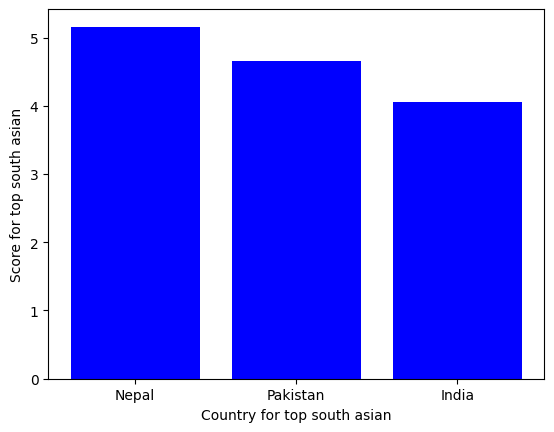

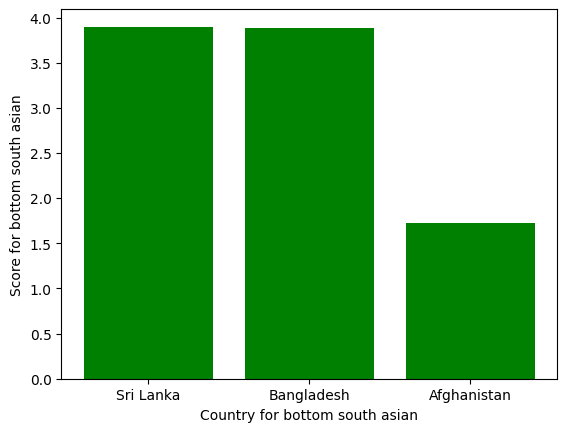

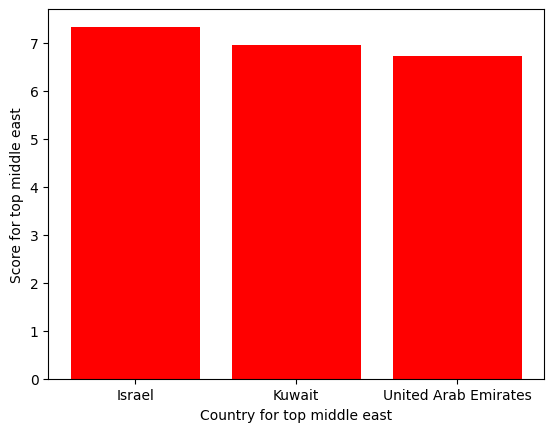

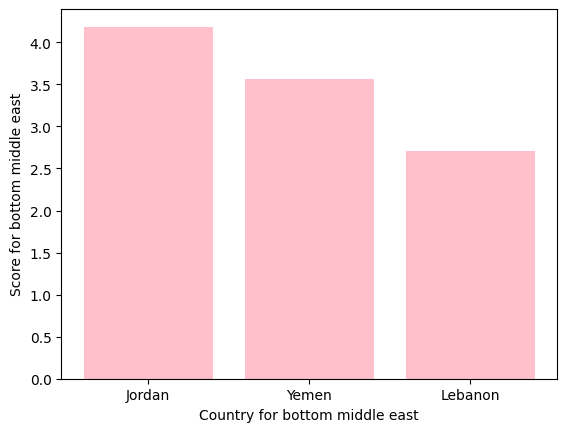

In [39]:

middle_east_top_3 = middle_east_datas.sort_values(by='score', ascending=False)
SADF_top_3=south_asian_data_frame.sort_values(by = 'score',ascending=False)
# for middle east countries
print(middle_east_top_3['Country name'].head(3))
print(middle_east_top_3['Country name'].tail(3))
# for middle east countries
print(SADF_top_3['Country name'].head(3))
print(SADF_top_3['Country name'].tail(3))
x= SADF_top_3['Country name'].head(3)
y= SADF_top_3['score'].head(3)
plt.bar(x,y,color='blue')
plt.xlabel("Country for top south asian")
plt.ylabel("Score for top south asian")
plt.show()
x= SADF_top_3['Country name'].tail(3)
y= SADF_top_3['score'].tail(3)
plt.bar(x,y,color='green')
plt.xlabel("Country for bottom south asian")
plt.ylabel("Score for bottom south asian")
plt.show()
x= middle_east_top_3['Country name'].head(3)
y= middle_east_top_3['score'].head(3)
plt.bar(x,y,color='red')
plt.xlabel("Country for top middle east")
plt.ylabel("Score for top middle east")
plt.show()
x= middle_east_top_3['Country name'].tail(3)
y= middle_east_top_3['score'].tail(3)
plt.bar(x,y,color='pink')
plt.xlabel("Country for bottom middle east")
plt.ylabel("Score for bottom middle east")
plt.show()





  # **3. Metric Comparisons:**
  • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.
  
  • Which metrics show the largest disparity between the two regions?

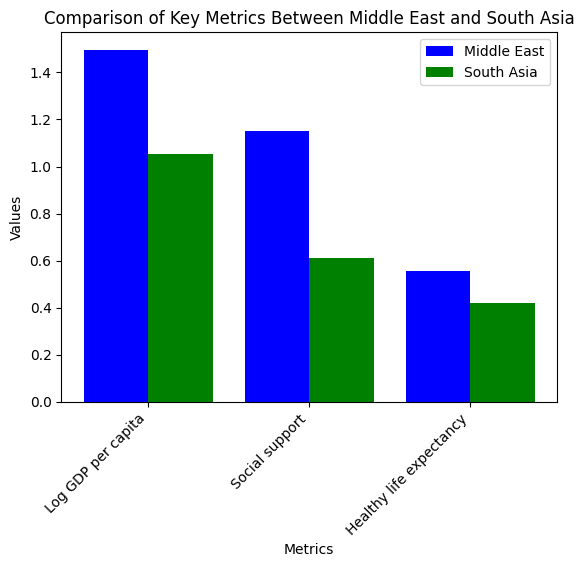

In [40]:
middle_east_GDP = middle_east_datas['Log GDP per capita'].mean()
middle_east_social_support = middle_east_datas['Social support'].mean()
middle_east_healthy_life_expectancy = middle_east_datas['Healthy life expectancy'].mean()
SADF_GDP = south_asian_data_frame['Log GDP per capita'].mean()
SADF_social_support = south_asian_data_frame['Social support'].mean()
SADF_health_expectancy = south_asian_data_frame['Healthy life expectancy'].mean()
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
middle_east_values = [middle_east_GDP, middle_east_social_support, middle_east_healthy_life_expectancy]
south_asian_values = [SADF_GDP, SADF_social_support, SADF_health_expectancy]
bar_width = 0.40
x = np.arange(len(metrics))
plt.bar(x - bar_width/2, middle_east_values, width=bar_width, color='blue', label='Middle East')
plt.bar(x + bar_width/2, south_asian_values, width=bar_width, color='green', label='South Asia')
plt.xticks(ticks=x, labels=metrics, rotation=45, ha='right')
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Comparison of Key Metrics Between Middle East and South Asia")
plt.legend()
plt.show()

# **4. Happiness Disparity:**
 • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

 • Which region has greater variability in happiness?

In [41]:
south_asian_range = south_asian_data_frame['score'].max()-south_asian_data_frame['score'].min()
middle_east_range = middle_east_datas['score'].max()-middle_east_datas['score'].min()
south_asian_cv = south_asian_data_frame['score'].std()/south_asian_data_frame['score'].mean()
middle_east_cv=middle_east_datas['score'].std()/south_asian_data_frame['score'].mean()
print("Ranges: ",south_asian_range,middle_east_range)
print("Coeffecient of variations: ",south_asian_cv,middle_east_cv)

Ranges:  3.4370000000000003 4.634
Coeffecient of variations:  0.3021482883337427 0.4020367506886406


# **5. Correlation Analysis:**
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

0.8005185224163315 0.874512371253192
0.8632202433827544 0.8632202433827544


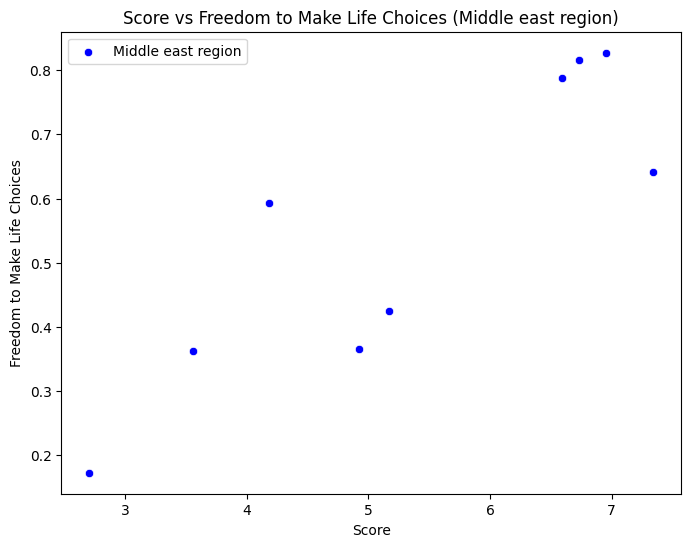

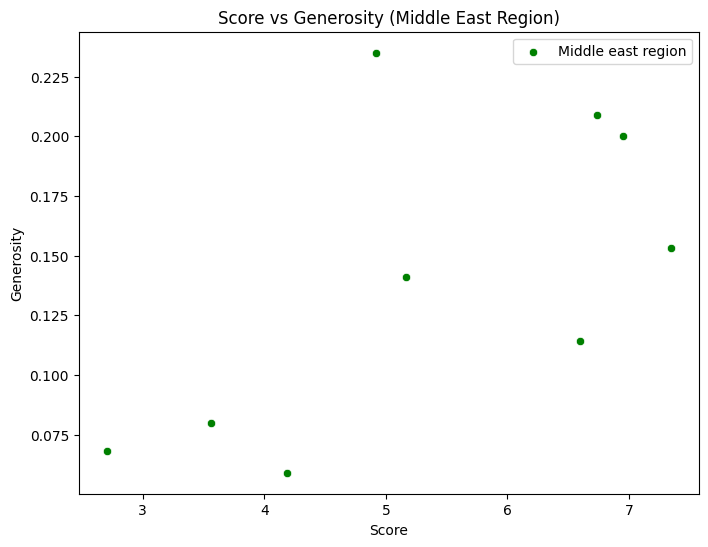

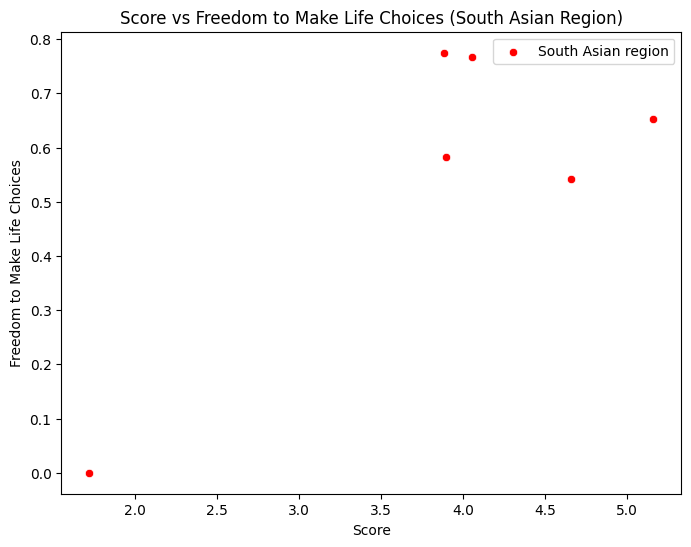

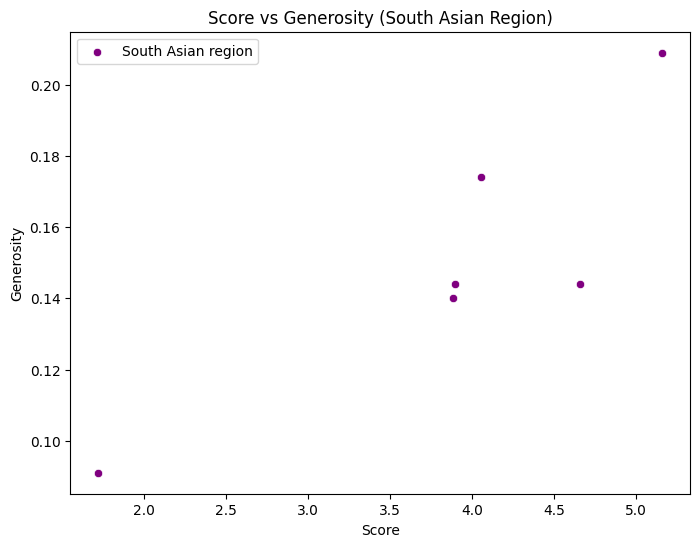

In [34]:
middle_east_score = middle_east_datas['score']
middle_east_freedom =middle_east_datas['Freedom to make life choices']
middle_east_generosity = middle_east_datas['Generosity']
south_asian_score =south_asian_data_frame['score']
south_asian_freedom =south_asian_data_frame['Freedom to make life choices']
south_asian_generosity=south_asian_data_frame['Generosity']
corr_Sadf = south_asian_score.corr(south_asian_freedom,method='pearson')
corr_generosity=south_asian_score.corr(south_asian_generosity,method='pearson')
print(corr_Sadf,corr_generosity)
corr_middle_east = middle_east_score.corr(middle_east_freedom,method='pearson')
corr_middle_east_generosity = middle_east_score.corr(middle_east_generosity,method='pearson')
print(corr_middle_east,corr_middle_east)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=middle_east_datas, x=middle_east_score, y=middle_east_freedom, color='blue', label='Middle east region')
plt.title('Score vs Freedom to Make Life Choices (Middle east region)')
plt.xlabel('Score')
plt.ylabel('Freedom to Make Life Choices')
plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=middle_east_datas, x=middle_east_score, y=middle_east_generosity, color='green', label='Middle east region')
plt.title('Score vs Generosity (Middle East Region)')
plt.xlabel('Score')
plt.ylabel('Generosity')
plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=south_asian_data_frame, x=south_asian_score, y=south_asian_freedom, color='red', label='South Asian region')
plt.title('Score vs Freedom to Make Life Choices (South Asian Region)')
plt.xlabel('Score')
plt.ylabel('Freedom to Make Life Choices')
plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=south_asian_data_frame, x=south_asian_score, y=south_asian_generosity, color='purple', label='South Asian region')
plt.title('Score vs Generosity (South Asian Region)')
plt.xlabel('Score')
plt.ylabel('Generosity')
plt.legend()
plt.show()

# **6. Outlier Detection:**
 • Identify outlier countries in both regions based on Score and GDP per Capita.

 • Plot these outliers and discuss their implications.

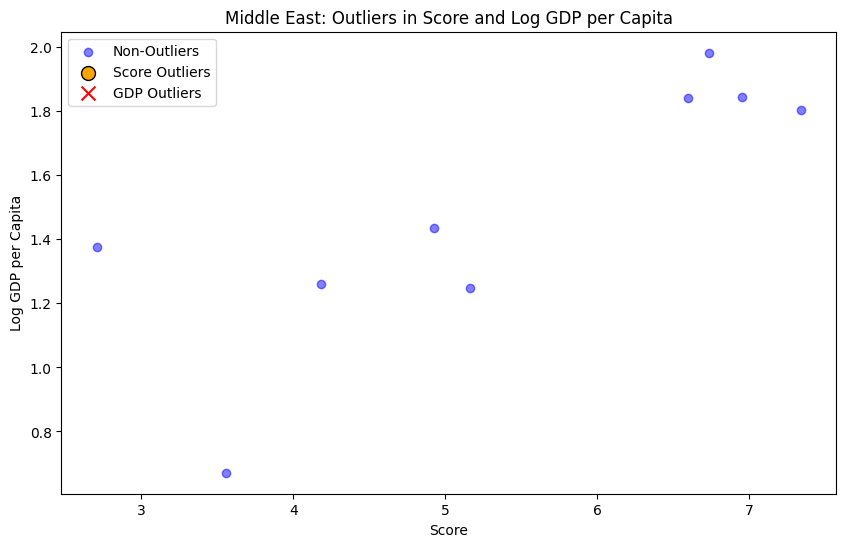

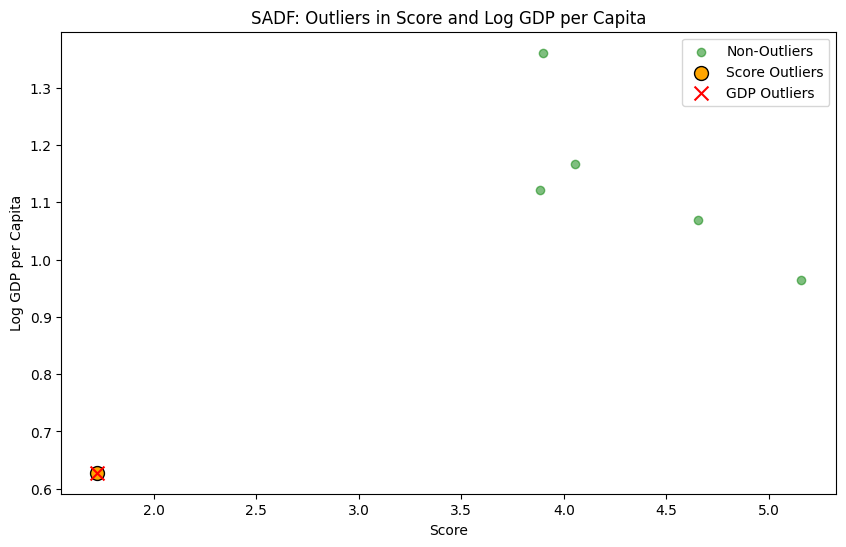

In [37]:
middle_east_score = middle_east_datas['score']
middle_east_gdp =middle_east_datas['Log GDP per capita']
SADF_score =south_asian_data_frame['score']
SADF_gdp =south_asian_data_frame['Log GDP per capita']
def outliers(col_name):
    Q1 = col_name.quantile(0.25)
    Q3 = col_name.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (col_name < lower_bound) | (col_name > upper_bound)
middle_east_outliers_scr =outliers(middle_east_score)
middle_east_outliers_gdp =outliers(middle_east_gdp)
SADF_outliers_scr = outliers(SADF_score)
SADF_outliers_gdp = outliers(SADF_gdp)
plt.figure(figsize=(10, 6))
plt.scatter(middle_east_datas['score'], middle_east_datas['Log GDP per capita'], label='Non-Outliers', c='blue', alpha=0.5)
plt.scatter(middle_east_datas[middle_east_outliers_scr]['score'],
            middle_east_datas[middle_east_outliers_scr]['Log GDP per capita'],
            c='orange', label='Score Outliers', marker='o', edgecolors='black', s=100)
plt.scatter(middle_east_datas[middle_east_outliers_gdp]['score'],
            middle_east_datas[middle_east_outliers_gdp]['Log GDP per capita'],
            c='red', label='GDP Outliers', marker='x', s=100)
plt.title("Middle East: Outliers in Score and Log GDP per Capita")
plt.xlabel("Score")
plt.ylabel("Log GDP per Capita")
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(south_asian_data_frame['score'], south_asian_data_frame['Log GDP per capita'], label='Non-Outliers', c='green', alpha=0.5)
plt.scatter(south_asian_data_frame[SADF_outliers_scr]['score'],
           south_asian_data_frame[SADF_outliers_scr]['Log GDP per capita'],
            c='orange', label='Score Outliers', marker='o', edgecolors='black', s=100)
plt.scatter(south_asian_data_frame[SADF_outliers_gdp]['score'],
            south_asian_data_frame[SADF_outliers_gdp]['Log GDP per capita'],
            c='red', label='GDP Outliers', marker='x', s=100)
plt.title("SADF: Outliers in Score and Log GDP per Capita")
plt.xlabel("Score")
plt.ylabel("Log GDP per Capita")
plt.legend()
plt.show()

# **7. Visualization:**
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

<ipython-input-36-70320f7b7792>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Score', data=data, palette='Set2')


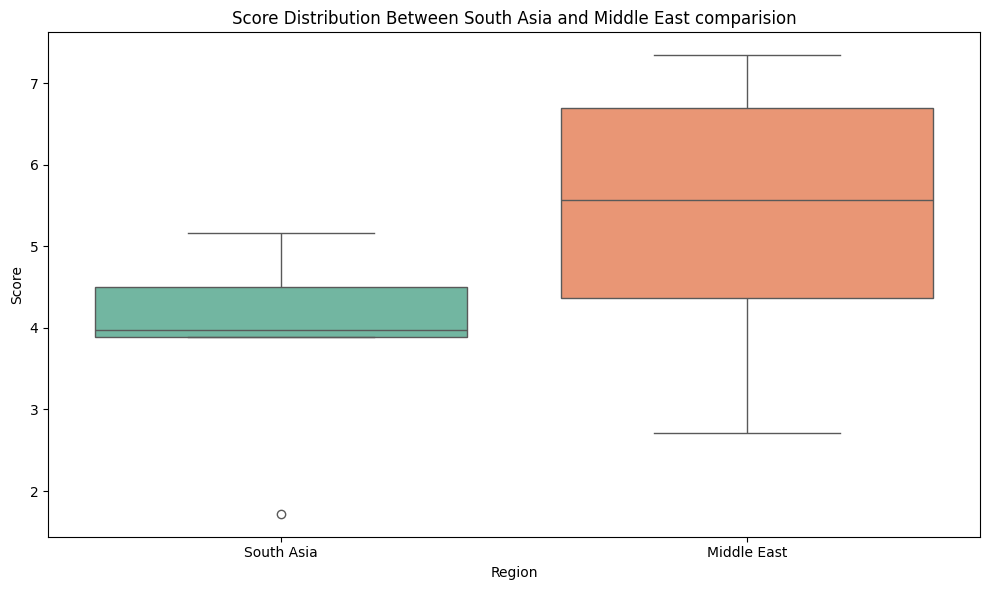

In [36]:
south_asian_scores = south_asian_data_frame['score']
middle_east_scores = middle_east_datas['score']
data = pd.DataFrame({
    'Score': pd.concat([south_asian_scores, middle_east_scores]),
    'Region': ['South Asia'] * len(south_asian_scores) + ['Middle East'] * len(middle_east_scores)
})
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Score', data=data, palette='Set2')
plt.xlabel("Region")
plt.ylabel("Score")
plt.title("Score Distribution Between South Asia and Middle East comparision")
plt.tight_layout()
plt.show()